In [1]:
import tensorflow as tf
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [2]:
x_train.shape

(60000, 28, 28)

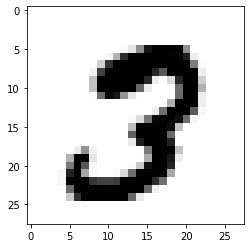

In [3]:
import matplotlib.pyplot as plt
Sample_Image_index = 12345
plt.imshow(x_train[Sample_Image_index], cmap = 'Greys')

In [4]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [5]:
print(y_train[Sample_Image_index])

3


In [8]:
# I need to reshape the original data which is 28 X 28
# I need to make it as b X 28 X 28 X 1
# why? because this is the way the tf model intakes the input data

# so instead of having 60k X 28 X 28 data points; I am having 60k X 28 X 28 X 1
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape_of_individual_samples = (28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# originally each pixel is between 0 and 255
# with this code we are mapping it to range between 0 and 1

x_train /= 255
x_test /= 255


In [9]:
print('x_train_shape: ', x_train.shape)
print('x_test_shape: ', x_test.shape)


x_train_shape:  (60000, 28, 28, 1)
x_test_shape:  (10000, 28, 28, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


model = Sequential() # type of DNN
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape_of_individual_samples))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 2.3034 - accuracy: 0.1066
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 2.3014 - accuracy: 0.1107
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 2.3013 - accuracy: 0.1117
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3012 - accuracy: 0.1133
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 2.3009 - accuracy: 0.1136
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3015 - accuracy: 0.1119
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3013 - accuracy: 0.1127
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3014 - accuracy: 0.1125
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 2.3014 - accuracy: 0.1133
Epoch 10/10
1875/1875 [==============================] - 16s 9ms/step - l